In [ ]:
from IPython.core.display import Image, display
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.stats import multivariate_normal, norm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as LR

from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/SaratogaHouses.csv')
df.head()

price  lotSize  age  landValue  livingArea  pctCollege  bedrooms  \
0  132500     0.09   42      50000         906          35         2   
1  181115     0.92    0      22300        1953          51         3   
2  109000     0.19  133       7300        1944          51         4   
3  155000     0.41   13      18700        1944          51         3   
4   86060     0.11    0      15000         840          51         2   

   fireplaces  bathrooms  rooms          heating      fuel              sewer  \
0           1        1.0      5         electric  electric             septic   
1           0        2.5      6  hot water/steam       gas             septic   
2           1        1.0      8  hot water/steam       gas  public/commercial   
3           1        1.5      5          hot air       gas             septic   
4           0        1.0      3          hot air       gas  public/commercial   

  waterfront newConstruction centralAir  
0         No              No         No  
1         No              No         No  
2         No              No         No  
3         No              No         No  
4         No             Yes        Yes

In [ ]:
df.tail()

price  lotSize  age  landValue  livingArea  pctCollege  bedrooms  \
1723  289000     0.38   32      24200        2310          61         5   
1724  285000     0.94   37      36200        2564          61         4   
1725  194900     0.39    9      20400        1099          51         2   
1726  125000     0.24   48      16800        1225          51         3   
1727  111300     0.59   86      26000        1959          51         3   

      fireplaces  bathrooms  rooms          heating fuel              sewer  \
1723           1        2.5     11  hot water/steam  gas  public/commercial   
1724           1        2.5     11  hot water/steam  gas  public/commercial   
1725           0        1.0      3          hot air  gas  public/commercial   
1726           1        1.0      7          hot air  gas  public/commercial   
1727           0        1.0      6          hot air  gas             septic   

     waterfront newConstruction centralAir  
1723         No              No         No  
1724         No              No         No  
1725         No              No         No  
1726         No              No         No  
1727         No              No         No

In [ ]:
print("Cargadas {0:d} observaciones con {1:d} columnas\n".format(len(df), len(df.columns)))

Cargadas 1728 observaciones con 16 columnas



In [ ]:
df.columns

Index(['price', 'lotSize', 'age', 'landValue', 'livingArea', 'pctCollege',
       'bedrooms', 'fireplaces', 'bathrooms', 'rooms', 'heating', 'fuel',
       'sewer', 'waterfront', 'newConstruction', 'centralAir'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            1728 non-null   int64  
 1   lotSize          1728 non-null   float64
 2   age              1728 non-null   int64  
 3   landValue        1728 non-null   int64  
 4   livingArea       1728 non-null   int64  
 5   pctCollege       1728 non-null   int64  
 6   bedrooms         1728 non-null   int64  
 7   fireplaces       1728 non-null   int64  
 8   bathrooms        1728 non-null   float64
 9   rooms            1728 non-null   int64  
 10  heating          1728 non-null   object 
 11  fuel             1728 non-null   object 
 12  sewer            1728 non-null   object 
 13  waterfront       1728 non-null   object 
 14  newConstruction  1728 non-null   object 
 15  centralAir       1728 non-null   object 
dtypes: float64(2), int64(8), object(6)
memory usage: 216.1+ KB


In [ ]:
round(df.isnull().sum().sort_values(ascending=False)/len(df),2)

price              0.0
lotSize            0.0
age                0.0
landValue          0.0
livingArea         0.0
pctCollege         0.0
bedrooms           0.0
fireplaces         0.0
bathrooms          0.0
rooms              0.0
heating            0.0
fuel               0.0
sewer              0.0
waterfront         0.0
newConstruction    0.0
centralAir         0.0
dtype: float64

**No se observan datos faltantes en el df**

In [ ]:
df.describe()

price      lotSize          age      landValue   livingArea  \
count    1728.000000  1728.000000  1728.000000    1728.000000  1728.000000   
mean   211966.705440     0.500214    27.916088   34557.187500  1754.975694   
std     98441.391015     0.698680    29.209988   35021.168056   619.935553   
min      5000.000000     0.000000     0.000000     200.000000   616.000000   
25%    145000.000000     0.170000    13.000000   15100.000000  1300.000000   
50%    189900.000000     0.370000    19.000000   25000.000000  1634.500000   
75%    259000.000000     0.540000    34.000000   40200.000000  2137.750000   
max    775000.000000    12.200000   225.000000  412600.000000  5228.000000   

        pctCollege     bedrooms   fireplaces    bathrooms        rooms  
count  1728.000000  1728.000000  1728.000000  1728.000000  1728.000000  
mean     55.567708     3.154514     0.601852     1.900174     7.041667  
std      10.333581     0.817351     0.556102     0.658352     2.316453  
min      20.000000     1.000000     0.000000     0.000000     2.000000  
25%      52.000000     3.000000     0.000000     1.500000     5.000000  
50%      57.000000     3.000000     1.000000     2.000000     7.000000  
75%      64.000000     4.000000     1.000000     2.500000     8.250000  
max      82.000000     7.000000     4.000000     4.500000    12.000000

**Utilizo el Profile Report para tener una primera impresión del df y de las **

In [ ]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Tratamiento de duplicados y ceros

In [ ]:
#Lo primero que veo es que hay filas duplicadas, así que las elimino para continuar con el análisis:
duplicados = df[df.duplicated()]
duplicados

price  lotSize  age  landValue  livingArea  pctCollege  bedrooms  \
898   131600     0.16   17      15100        1385          54         2   
903   105000     0.16   20      15700         912          54         2   
904   122500     0.15   18      15100        1184          54         2   
910   188900     0.32   18      27000        1294          54         3   
914   126000     0.16   17      15600         908          54         2   
927   190000     0.59   15      25000        1300          54         3   
1692  212000     0.34   21      27000        1508          51         3   

      fireplaces  bathrooms  rooms   heating      fuel              sewer  \
898            1        1.5      7  electric  electric  public/commercial   
903            0        1.5      3  electric  electric  public/commercial   
904            0        1.5      3  electric  electric  public/commercial   
910            0        1.0      4  electric  electric  public/commercial   
914            0        1.0      4  electric  electric  public/commercial   
927            1        1.5      5   hot air       gas             septic   
1692           0        1.5      4  electric  electric  public/commercial   

     waterfront newConstruction centralAir  
898          No              No         No  
903          No              No         No  
904          No              No         No  
910          No              No         No  
914          No              No         No  
927          No              No        Yes  
1692         No              No         No

In [ ]:
df_limpio = df.drop_duplicates()
duplicados2 = df_limpio[df_limpio.duplicated()]
duplicados2

Empty DataFrame
Columns: [price, lotSize, age, landValue, livingArea, pctCollege, bedrooms, fireplaces, bathrooms, rooms, heating, fuel, sewer, waterfront, newConstruction, centralAir]
Index: []

**Una vez que limpiamos los duplicados, procedo a analizar las celdas que tienen de valor 0. Me marca que hay muchos en la columna Age, pero pueden tener sentido porque son casas nuevas. Eso lo puedo verificar con la columna "New construction"**

In [ ]:
filas_con_cero_y_no = df_limpio.loc[(df_limpio['age'] == 0) & (df_limpio['newConstruction'] == 'No')]
filas_con_cero_y_no

price  lotSize  age  landValue  livingArea  pctCollege  bedrooms  \
1     181115     0.92    0      22300        1953          51         3   
17    253750     2.00    0      49800        2816          71         4   
37    169900     0.59    0      17300        1884          52         4   
39    245900     0.19    0      20700        2394          71         4   
44    279550     1.34    0      44400        2479          71         4   
45    246500     1.00    0      17100        2714          71         4   
86    185000     1.00    0       4000         768          22         4   
133   232478     1.00    0      15900        2598          51         4   
250   208700     0.40    0      15000        2458          64         4   
269    85000     0.49    0      13000        2401          64         4   
281   195160     0.32    0      35000        1863          64         3   
298   272500     0.03    0      56800        2930          64         4   
307   184350     0.59    0      38400        2161          64         4   
369   255250     0.50    0      17500        2099          64         4   
476   324000     3.64    0       7400        2092          47         4   
534   249835     0.52    0      77000        2474          57         4   
535   188095     0.15    0      36000        2057          57         3   
542   168900     0.16    0      36800        1672          57         3   
548   512971     0.01    0      12500        1904          57         2   
555   262138     0.15    0     114000        1631          57         3   
562   200136     0.15    0      54000        1632          57         3   
564   366703     0.15    0      95000        2117          57         3   
584   371165     0.39    0      85400        2786          57         4   
585   287600     0.07    0      48200        2242          57         3   
591   549254     0.25    0      63000        2885          57         3   
594   195388     0.14    0      35200        2124          57         3   
596   330850     0.46    0      89600        2515          57         4   
597   248495     0.63    0      98500        2294          57         4   
599   240000     0.48    0      90800        2022          57         3   
601   500075     0.91    0     239300        3400          57         3   
603   270000     0.46    0      89600        2560          57         3   
605   280000     0.16    0      62600        2494          57         3   
607   248220     0.46    0      89600        2550          57         3   
614   169450     0.15    0      36000        1254          57         3   
617   166000     0.14    0      35200        1258          57         3   
618   160000     0.23    0      42400        1219          57         3   
623   288650     0.08    0      49800        2242          57         3   
629   249230     0.18    0     119700        1902          57         2   
631   301900     0.73    0     103500        2896          57         4   
661   340455     0.38    0      84800        2886          57         4   
684   597185     1.07    0     193200        4210          57         4   
766    88100     0.14    0       7400         840          36         2   
986   445000     0.58    0      17400        3157          63         4   
1152  262000     0.46    0      11100        2364          33         4   
1167  289900     0.30    0      35800        2376          52         4   
1218  359900     0.50    0      65000        1932          62         3   
1419  440760     0.38    0      13000        2917          64         4   
1588  365000     0.56    0      37900        2950          64         4   

      fireplaces  bathrooms  rooms          heating      fuel  \
1              0        2.5      6  hot water/steam       gas   
17             1        2.5     12          hot air       gas   
37             1        2.5      9          hot air       gas   
39             1        2.5      7          hot air       gas   
44    

**Voy a asumir que el error está en la columna age y no en la de New construction porque las mayorías utilizan gas y eso se relaciona más a casas antiguas que nuevas. Por ende, voy a reemplazar los valores con 0 y NO en new construction por el promedio del resto de los valores**

In [ ]:
promedio_age = df_limpio[(df_limpio['age'] != 0) & (df_limpio['newConstruction'] != 'No')]['age'].mean()
df_limpio.loc[(df_limpio['age'] == 0) & (df_limpio['newConstruction'] == 'No'), 'age'] = promedio_age

filas_con_cero_y_no2 = df_limpio.loc[(df_limpio['age'] == 0) & (df_limpio['newConstruction'] == 'No')]
filas_con_cero_y_no2

Empty DataFrame
Columns: [price, lotSize, age, landValue, livingArea, pctCollege, bedrooms, fireplaces, bathrooms, rooms, heating, fuel, sewer, waterfront, newConstruction, centralAir]
Index: []

**Me fijo si hay valores con 0 en otras columnas importantes**

In [ ]:
recuentos_ceros = {}

for columna in df_limpio.columns:
    recuento_ceros = (df_limpio[columna] == 0).sum()
    recuentos_ceros[columna] = recuento_ceros

for columna, recuento in recuentos_ceros.items():
    print(f"Columna '{columna}': {recuento} filas con valor 0")

Columna 'price': 0 filas con valor 0
Columna 'lotSize': 2 filas con valor 0
Columna 'age': 35 filas con valor 0
Columna 'landValue': 0 filas con valor 0
Columna 'livingArea': 0 filas con valor 0
Columna 'pctCollege': 0 filas con valor 0
Columna 'bedrooms': 0 filas con valor 0
Columna 'fireplaces': 735 filas con valor 0
Columna 'bathrooms': 1 filas con valor 0
Columna 'rooms': 0 filas con valor 0
Columna 'heating': 0 filas con valor 0
Columna 'fuel': 0 filas con valor 0
Columna 'sewer': 0 filas con valor 0
Columna 'waterfront': 0 filas con valor 0
Columna 'newConstruction': 0 filas con valor 0
Columna 'centralAir': 0 filas con valor 0


**En la columna LotSize hay 2 0 cuando no deberían haber, vamos a corregirlos**

In [ ]:
df_limpio.loc[df_limpio['lotSize'] == 0]


price  lotSize   age  landValue  livingArea  pctCollege  bedrooms  \
15    89900      0.0  88.0       2500         936          57         3   
701  775000      0.0   5.0     412600        2472          57         3   

     fireplaces  bathrooms  rooms          heating fuel              sewer  \
15            0        1.0      4  hot water/steam  gas  public/commercial   
701           1        2.5      9          hot air  gas             septic   

    waterfront newConstruction centralAir  
15          No              No         No  
701        Yes              No        Yes

In [ ]:
#Para rellenar estos valores y mantener las columnas voy a utilizar como referencia el valor de alguna fila que tenga un livingArea parecido:
tolerancia_livingArea = 20

filas_lotSize_cero = df_limpio[df_limpio['lotSize'] == 0]

for index, fila in filas_lotSize_cero.iterrows():
    rango_min_livingArea = fila['livingArea'] - tolerancia_livingArea
    rango_max_livingArea = fila['livingArea'] + tolerancia_livingArea

    filas_similares = df_limpio[(df_limpio['livingArea'] >= rango_min_livingArea) &
                                (df_limpio['livingArea'] <= rango_max_livingArea) &
                                (df_limpio['lotSize'] != 0)]

    promedio_lotSize = filas_similares['lotSize'].mean()
    df_limpio.at[index, 'lotSize'] = promedio_lotSize


df_limpio.loc[df_limpio['lotSize'] == 0]


Empty DataFrame
Columns: [price, lotSize, age, landValue, livingArea, pctCollege, bedrooms, fireplaces, bathrooms, rooms, heating, fuel, sewer, waterfront, newConstruction, centralAir]
Index: []

In [ ]:
#Ahora quiero analizar las filas que tienen en sewer NONE, ya que es raro que no tengand desague, salvo que sean casas muy viejas:
df_limpio.loc[df_limpio['sewer'] == 'none']

price  lotSize        age  landValue  livingArea  pctCollege  bedrooms  \
9     122900     1.94   4.000000      21200        1416          44         3   
17    253750     2.00   1.347826      49800        2816          71         4   
36    209900     0.46   1.000000      15200        2060          52         4   
39    245900     0.19   1.347826      20700        2394          71         4   
45    246500     1.00   1.347826      17100        2714          71         4   
90    150000     0.32  11.000000      19400        1656          51         3   
133   232478     1.00   1.347826      15900        2598          51         4   
497   202000     1.00  12.000000        500        1944          36         3   
563   395000     1.40  12.000000     128500        2186          57         3   
1017  211000     1.00  18.000000      31800        1404          63         3   
1180  171000     0.58  14.000000      19000        1636          35         4   
1253  571000     1.00  14.000000     128500        2186          62         3   

      fireplaces  bathrooms  rooms   heating      fuel sewer waterfront  \
9              0        1.5      6   hot air       gas  none         No   
17             1        2.5     12   hot air       gas  none         No   
36             1        2.5      7   hot air       gas  none         No   
39             1        2.5      7   hot air       gas  none         No   
45             1        2.5      9   hot air       gas  none         No   
90             0        1.5      6  electric  electric  none         No   
133            1        2.5      9   hot air       gas  none         No   
497            1        2.5      7   hot air       oil  none         No   
563            0        2.5      6   hot air       gas  none         No   
1017           0        1.0      6   hot air       gas  none         No   
1180           1        1.5      9   hot air       oil  none         No   
1253           0        2.5     10   hot air       gas  none         No   

     newConstruction centralAir  
9                 No         No  
17                No        Yes  
36                No         No  
39                No        Yes  
45                No         No  
90                No         No  
133               No         No  
497               No         No  
563               No        Yes  
1017              No        Yes  
1180              No         No  
1253              No        Yes

**Es raro que tenga none porque son casas con poca antiguedad y con baños, entonces no tiene sentido. Al ser pocas filas voy a reemplazarlos por public/commercial que es el más común**

In [ ]:
df_limpio.loc[df_limpio['sewer'] == 'none', 'sewer'] = 'public/commercial'
df_limpio.loc[df_limpio['sewer'] == 'none']

Empty DataFrame
Columns: [price, lotSize, age, landValue, livingArea, pctCollege, bedrooms, fireplaces, bathrooms, rooms, heating, fuel, sewer, waterfront, newConstruction, centralAir]
Index: []

**Observando en términos generales el df, se observa una alta correlación entre el precio, la cantidad de baños, el living area, el landvalue y la cantidad de rooms, todas cosas que hacen sentido. **

**Ahora voy a analizar a ver si hay outliers para podes mirar en más detalle las relaciones de las variables:**

## Analisis de Outliers

IndexError: index 10 is out of bounds for axis 0 with size 10

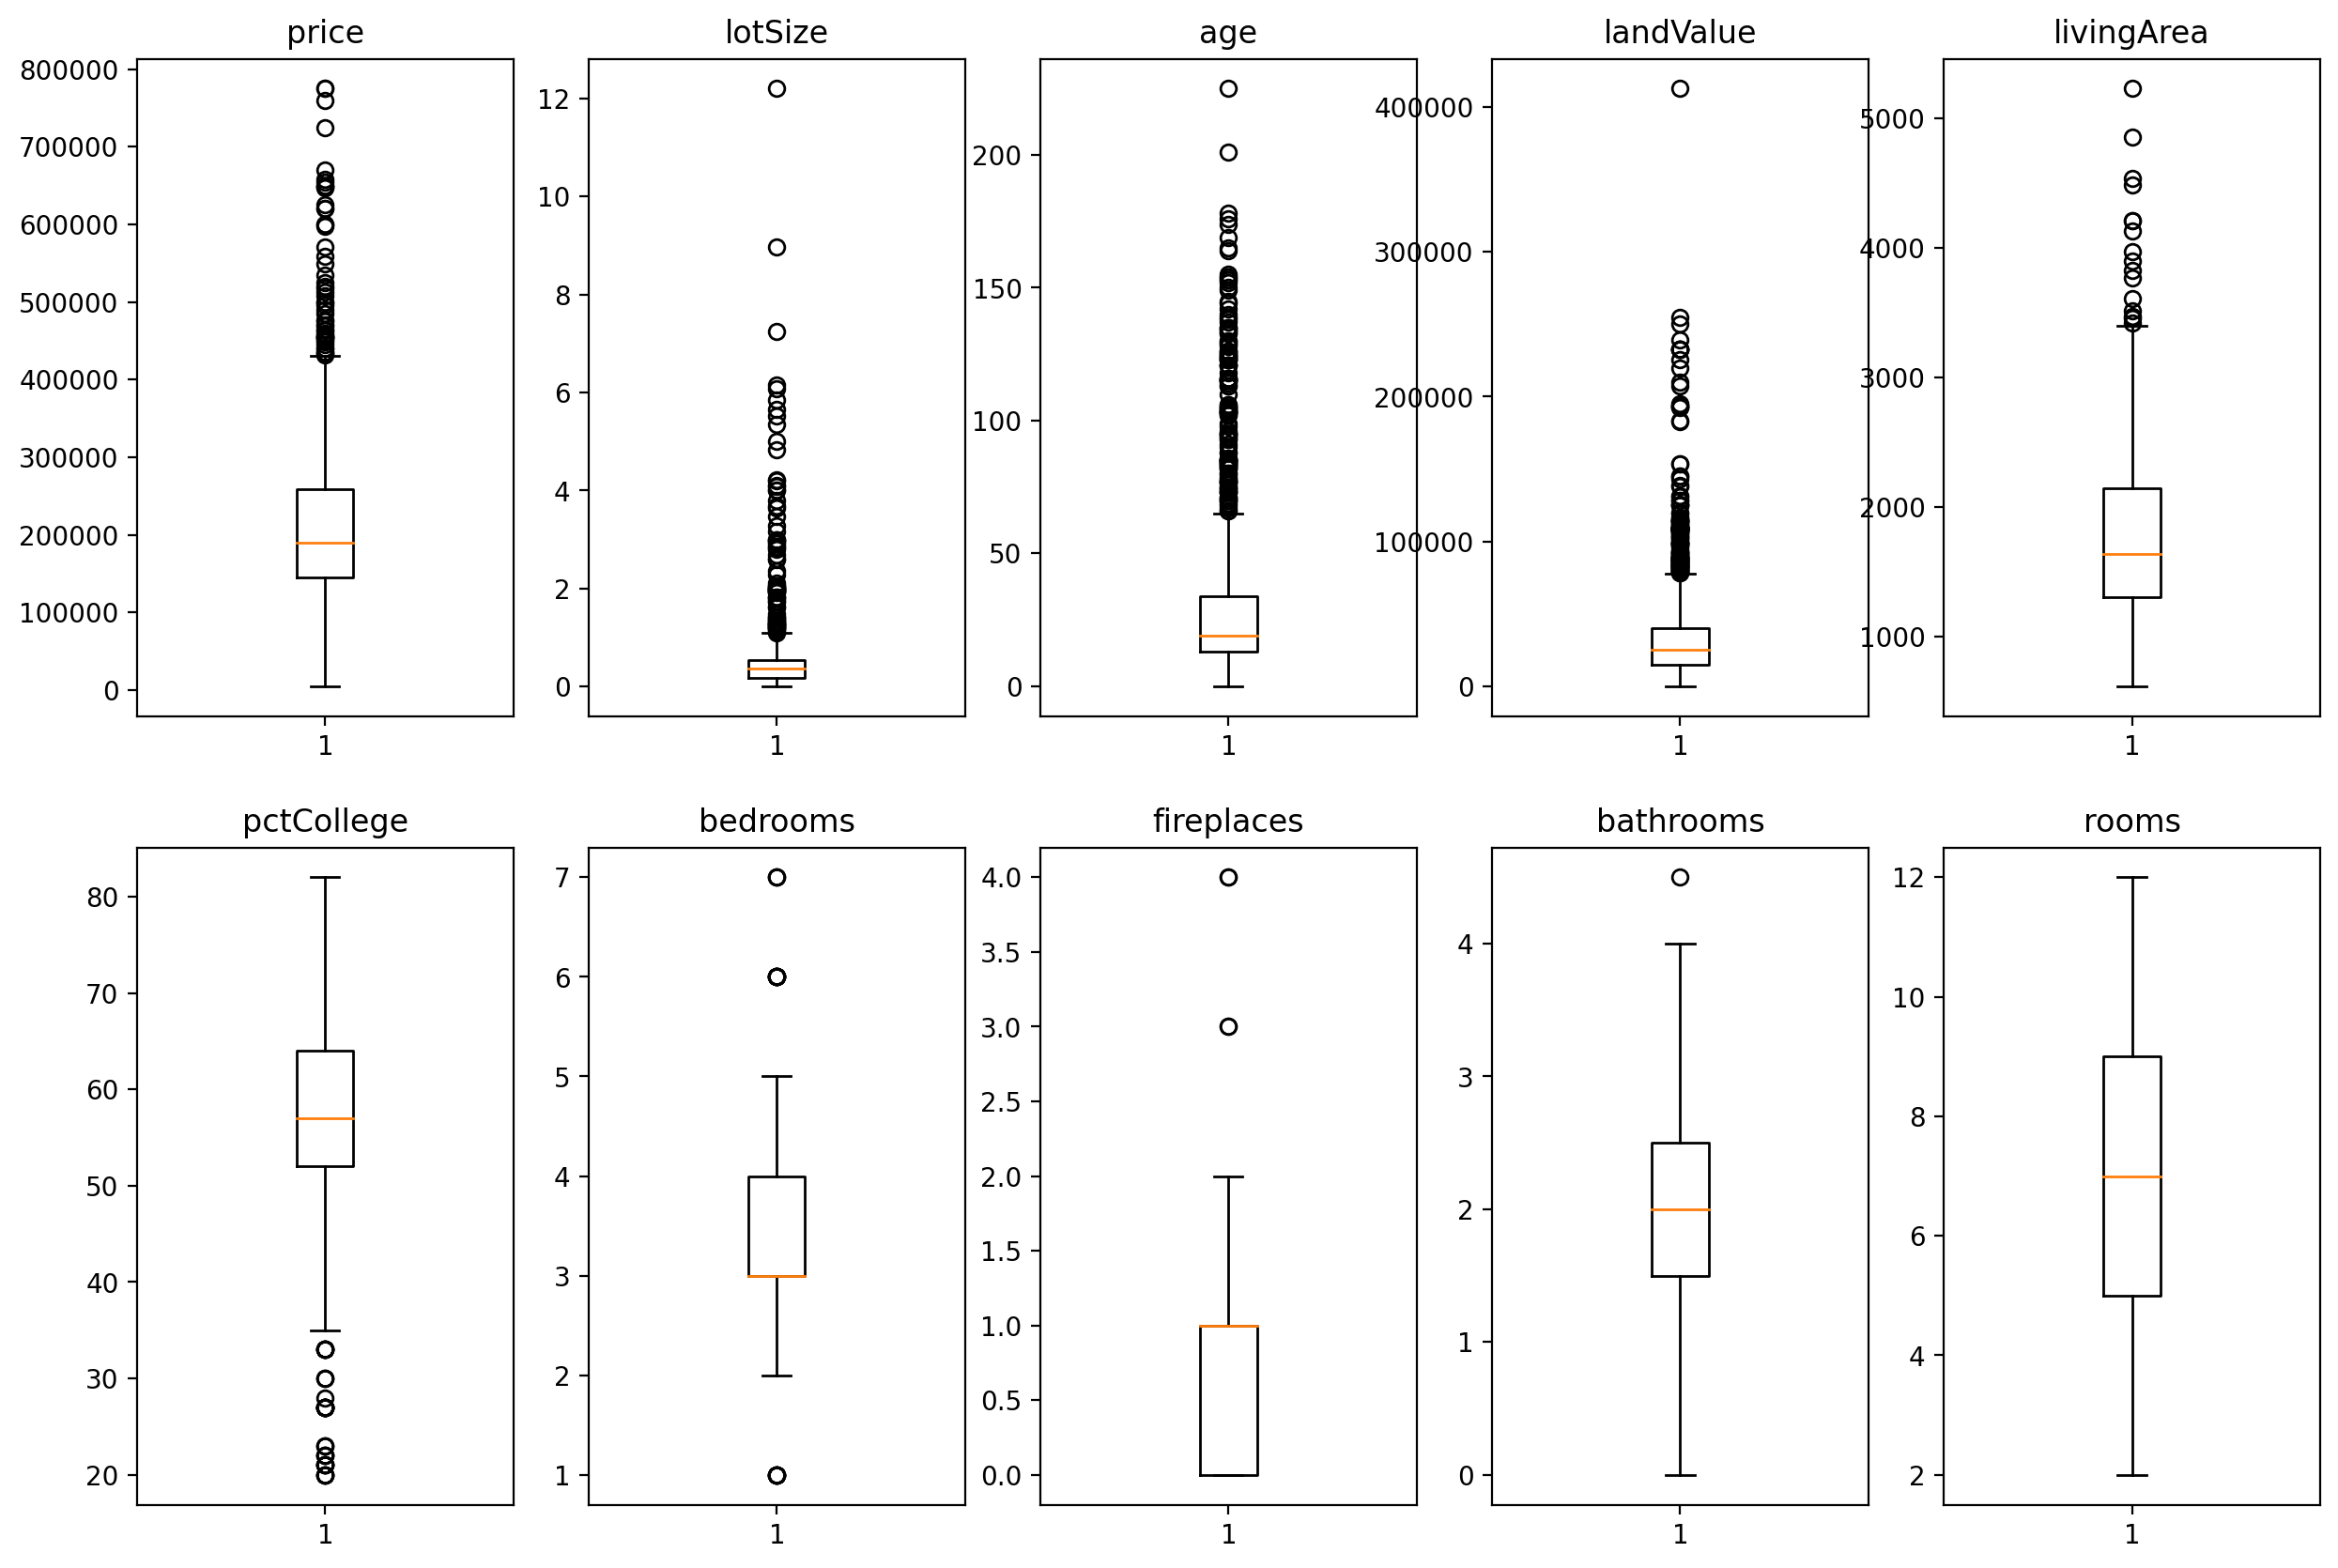

In [ ]:
columns = df_limpio.columns
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(columns):
    ax = axes[i]
    ax.boxplot(df_limpio[col])
    ax.set_title(col)

plt.tight_layout()
plt.show()

**Se observan muchos outliers, en precio, en Lotsize, en Age, En Landvalue, living area, pctCollege. Vamos a analizar a ver si tienen sentido o no.**

### Outliers Precios

In [ ]:
out_precios = df_limpio[df_limpio['price']> 500000]
out_precios

price  lotSize         age  landValue  livingArea  pctCollege  \
313   625000    0.450   14.000000     119500        5228          64   
477   520000    0.410   13.000000       3100        2702          47   
548   512971    0.010    1.347826      12500        1904          57   
553   559000    0.240   55.000000     255000        3090          57   
570   760000    1.220    2.000000     194700        3148          57   
590   620000    1.060   14.000000     125100        4856          57   
591   549254    0.250    1.347826      63000        2885          57   
601   500075    0.910    1.347826     239300        3400          57   
611   649000    1.040   10.000000     192900        4128          57   
665   600000    0.040   17.000000      36000        3191          57   
684   597185    1.070    1.347826     193200        4210          57   
686   518000    0.170  144.000000      99000        2847          57   
701   775000    0.562    5.000000     412600        2472          57   
710   650000    0.430    2.000000      87800        2754          57   
725   647000    1.080   14.000000     193300        2640          57   
729   535000    1.000   14.000000     192500        3254          57   
1169  600000    0.990    1.000000       5000        2660          62   
1194  655000    0.190   55.000000     103000         780          62   
1201  775000    0.480   31.000000      72600        3968          62   
1206  725000    0.210    3.000000      70600        2586          62   
1216  620000    0.530   23.000000     225800        3250          62   
1238  650000    0.340    3.000000      82400        3770          62   
1245  658300    0.690    3.000000     101500        3208          62   
1253  571000    1.000   14.000000     128500        2186          62   
1278  670000    0.110  121.000000      87000        2247          62   
1325  525000    0.460    1.000000      70100        2876          64   
1540  508000    0.170    1.000000     116700        3511          64   

      bedrooms  fireplaces  bathrooms  rooms          heating fuel  \
313          4           4        4.0     12          hot air  gas   
477          3           1        2.5     11          hot air  oil   
548          2           1        2.0      8          hot air  gas   
553          4           2        4.0     12  hot water/steam  gas   
570          5           0        3.5     12          hot air  gas   
590          5           2        4.0     12          hot air  oil   
591          3           1        2.5     11          hot air  gas   
601          3           0        3.0     12          hot air  gas   
611          3           2        3.5     12          hot air  gas   
665          3           2        3.5     12          hot air  gas   
684          4           1        3.5     12          hot air  gas   
686          3           1        1.5      7  hot water/steam  gas   
701          3           1        2.5      9          hot air  gas   
710          3           1        2.5     10          hot air  gas   
725          4           1        2.5     12          hot air  gas   
729          4           1        2.5     12          hot air  gas   
1169         4           1        3.5      8          hot air  gas   
1194         2           0        1.5      6          hot air  gas   
1201         5           4        3.5     12          hot air  gas   
1206         4           1        3.0     10          hot air  gas   
1216         3           2        2.5     10          hot air  gas   
1238         4           1        2.5     12          hot air  gas   
1245         4           1        2.5     11          hot air  gas   
1253         3           0        2.5     10          hot air  gas   
1278         4           0        2.0      8  hot water/steam  gas   
1325         5           1        3.5     12          hot air  gas   
1540         4           1        2.5     12          hot air  gas   

                  sewer water

In [ ]:
print(out_precios['lotSize'].mean() , df_limpio['lotSize'].mean())
print(out_precios['landValue'].mean() , df_limpio['landValue'].mean())
print(out_precios['rooms'].mean() , df_limpio['rooms'].mean())
print(out_precios['bathrooms'].mean() , df_limpio['bathrooms'].mean())

0.5597037037037037 0.5016339337594421
128988.88888888889 34616.10691458455
10.62962962962963 7.05287623474724
2.8518518518518516 1.9023823358512493


**En promedio las variables que más se correlacionaban con precio alto se ven más altas que el promedio general, por lo que se podrían explicar los precios altos, por ende, en el caso de los precios vamos a mantener todos los valores.**

### Outliers Lotsize

In [ ]:
out_lotsize = df_limpio[df_limpio['lotSize']> 4]
out_lotsize

price  lotSize   age  landValue  livingArea  pctCollege  bedrooms  \
12     85860     8.97  13.0       4800         704          41         2   
38    293000     7.24  43.0      36600        2022          71         4   
164   382500     4.08  13.0      75500        4534          64         6   
252   350000     5.84  12.0      20000        2916          64         3   
447   225000     6.07  14.0      25700        1240          57         3   
494   315000     4.10  15.0      26600        2550          54         3   
961   475000    12.20  19.0     111300        2599          63         3   
1130  375000     4.84   3.0      21500        1996          62         3   
1140  145000     5.52  20.0       5900        1056          36         2   
1222  260000     5.35  37.0     137800        1676          62         4   
1525  194000     6.15  64.0      73500        1960          64         3   
1550  215000     5.65  53.0      69400        1948          64         2   
1569  455000     4.20  29.0      70500        2828          64         3   
1626  224400     5.00  17.0      24100        1008          40         2   
1686  240000     4.21  38.0      70400        2204          51         3   

      fireplaces  bathrooms  rooms          heating      fuel  \
12             0        1.0      4         electric  electric   
38             2        3.0      6  hot water/steam       gas   
164            2        2.5     12          hot air       oil   
252            1        2.5      9          hot air       gas   
447            0        2.0      5          hot air       oil   
494            0        2.5      7  hot water/steam       oil   
961            1        2.5     11          hot air  electric   
1130           1        3.0      8  hot water/steam       gas   
1140           0        1.0      7         electric  electric   
1222           0        2.0      8          hot air       oil   
1525           1        1.5      9  hot water/steam       oil   
1550           1        1.5      5          hot air       oil   
1569           1        2.5     10         electric  electric   
1626           0        1.0      5         electric  electric   
1686           2        2.0      8  hot water/steam       oil   

                  sewer waterfront newConstruction centralAir  
12               septic         No              No         No  
38               septic         No              No         No  
164              septic         No              No        Yes  
252   public/commercial         No              No        Yes  
447              septic         No              No         No  
494              septic         No              No         No  
961              septic         No              No        Yes  
1130             septic         No              No        Yes  
1140             septic         No              No         No  
1222             septic         No              No        Yes  
1525             septic         No              No         No  
1550  public/commercial         No              No        Yes  
1569             septic         No              No        Yes  
1626             septic         No              No         No  
1686             septic         No              No         No

In [ ]:
print(out_lotsize['price'].mean() , df_limpio['price'].mean())
print(out_lotsize['landValue'].mean() , df_limpio['landValue'].mean())
print(out_lotsize['rooms'].mean() , df_limpio['rooms'].mean())
print(out_lotsize['bathrooms'].mean() , df_limpio['bathrooms'].mean())
print(out_lotsize['livingArea'].mean() , df_limpio['livingArea'].mean())

282317.3333333333 212203.64148750727
51573.333333333336 34616.10691458455
7.6 7.05287623474724
2.033333333333333 1.9023823358512493
2082.733333333333 1757.1801278326554


**Acá devuelta observo que los datos tienen sentido. Los lotes más grandes tienen en promedio más living area, más cuartos y más valor.**

### Outliers Age

In [ ]:
out_age = df_limpio[df_limpio['age']> 100]
out_age

price  lotSize    age  landValue  livingArea  pctCollege  bedrooms  \
2     109000     0.19  133.0       7300        1944          51         4   
10    325000     2.29  123.0      12600        2894          51         7   
13     97000     0.11  153.0       3100        1383          57         3   
26    135000     1.83  126.0       6000        1656          39         3   
33    227000     1.80  201.0      25500        1876          52         3   
...      ...      ...    ...        ...         ...         ...       ...   
1684  245000     0.36  106.0      35900        1836          51         4   
1685  422680     0.16  176.0      46200        4486          51         6   
1689  334000     0.32  116.0      16400        1668          51         3   
1695  245000     0.36  106.0      35900        1836          51         4   
1705  221450     0.36  121.0      33000        2699          61         6   

      fireplaces  bathrooms  rooms          heating fuel              sewer  \
2              1        1.0      8  hot water/steam  gas  public/commercial   
10             0        1.0     12          hot air  oil             septic   
13             0        2.0      5  hot water/steam  gas  public/commercial   
26             0        1.0      6  hot water/steam  oil             septic   
33             0        2.5      5          hot air  oil             septic   
...          ...        ...    ...              ...  ...                ...   
1684           1        1.5      6          hot air  gas  public/commercial   
1685           1        4.0     12  hot water/steam  gas  public/commercial   
1689           0        2.0      5          hot air  gas  public/commercial   
1695           1        1.5      8          hot air  gas  public/commercial   
1705           1        1.0     12          hot air  oil             septic   

     waterfront newConstruction centralAir  
2            No              No         No  
10           No              No         No  
13           No              No         No  
26           No              No         No  
33           No              No         No  
...         ...             ...        ...  
1684         No              No         No  
1685         No              No         No  
1689         No              No         No  
1695         No              No         No  
1705         No              No         No  

[83 rows x 16 columns]

In [ ]:
print(out_age['price'].mean() , df_limpio['price'].mean())
print(out_age['landValue'].mean() , df_limpio['landValue'].mean())
print(out_age['rooms'].mean() , df_limpio['rooms'].mean())
print(out_age['bathrooms'].mean() , df_limpio['bathrooms'].mean())
print(out_age['livingArea'].mean() , df_limpio['livingArea'].mean())
print(out_age['pctCollege'].mean() , df_limpio['pctCollege'].mean())
print(out_age['fireplaces'].mean() , df_limpio['fireplaces'].mean())
print(out_age.value_counts('fuel'), df_limpio.value_counts('fuel'))
print(out_age.value_counts('heating'), df_limpio.value_counts('heating'))

196732.46987951806 212203.64148750727
39349.39759036145 34616.10691458455
7.301204819277109 7.05287623474724
1.4156626506024097 1.9023823358512493
1722.2409638554218 1757.1801278326554
53.1566265060241 55.57582800697269
0.3132530120481928 0.6031377106333528
fuel
gas         55
oil         27
electric     1
Name: count, dtype: int64 fuel
gas         1196
electric     309
oil          216
Name: count, dtype: int64
heating
hot air            42
hot water/steam    40
electric            1
Name: count, dtype: int64 heating
hot air            1120
hot water/steam     302
electric            299
Name: count, dtype: int64


**Acá en la edad también hace sentido. Hay casas muy viejas, pero hay ciertas variables que acompañan esta tendencia, especialmente el método de fuel. Solo hay 1 con electricidad, el resto con gas o aceite, por lo que tiene sentido que sean viejas. **
**También la cantidad de fireplaces, En promedio hay la mitad que los que hay en el df completo.**

### *Outliers Landvalue*

In [ ]:
out_landvalue = df_limpio[df_limpio['landValue']> 18000]
out_landvalue

price  lotSize        age  landValue  livingArea  pctCollege  bedrooms  \
0     132500     0.09  42.000000      50000         906          35         2   
1     181115     0.92   1.347826      22300        1953          51         3   
3     155000     0.41  13.000000      18700        1944          51         3   
6     153000     0.40  33.000000      23300        2752          51         4   
8      90000     0.83  36.000000      22200        1632          51         3   
...      ...      ...        ...        ...         ...         ...       ...   
1722  249000     0.43  41.000000      45800        2426          61         4   
1723  289000     0.38  32.000000      24200        2310          61         5   
1724  285000     0.94  37.000000      36200        2564          61         4   
1725  194900     0.39   9.000000      20400        1099          51         2   
1727  111300     0.59  86.000000      26000        1959          51         3   

      fireplaces  bathrooms  rooms          heating      fuel  \
0              1        1.0      5         electric  electric   
1              0        2.5      6  hot water/steam       gas   
3              1        1.5      5          hot air       gas   
6              1        1.5      8  hot water/steam       oil   
8              0        1.5      8         electric  electric   
...          ...        ...    ...              ...       ...   
1722           2        2.0      7  hot water/steam       gas   
1723           1        2.5     11  hot water/steam       gas   
1724           1        2.5     11  hot water/steam       gas   
1725           0        1.0      3          hot air       gas   
1727           0        1.0      6          hot air       gas   

                  sewer waterfront newConstruction centralAir  
0                septic         No              No         No  
1                septic         No              No         No  
3                septic         No              No         No  
6                septic         No              No         No  
8                septic         No              No         No  
...                 ...        ...             ...        ...  
1722  public/commercial         No              No         No  
1723  public/commercial         No              No         No  
1724  public/commercial         No              No         No  
1725  public/commercial         No              No         No  
1727             septic         No              No         No  

[1099 rows x 16 columns]

In [ ]:
print(out_landvalue['price'].mean() , df_limpio['price'].mean())
print(out_landvalue['age'].mean() , df_limpio['age'].mean())
print(out_landvalue['rooms'].mean() , df_limpio['rooms'].mean())
print(out_landvalue['bathrooms'].mean() , df_limpio['bathrooms'].mean())
print(out_landvalue['livingArea'].mean() , df_limpio['livingArea'].mean())
print(out_landvalue['pctCollege'].mean() , df_limpio['pctCollege'].mean())
print(out_landvalue['fireplaces'].mean() , df_limpio['fireplaces'].mean())
print(out_landvalue.value_counts('fuel'), df_limpio.value_counts('fuel'))
print(out_landvalue.value_counts('heating'), df_limpio.value_counts('heating'))
print(out_landvalue.value_counts('sewer'), df_limpio.value_counts('sewer'))

240027.2848043676 212203.64148750727
27.49515369703683 27.99401258115858
7.5277525022747955 7.05287623474724
2.0232029117379438 1.9023823358512493
1916.056414922657 1757.1801278326554
59.05550500454959 55.57582800697269
0.7179253867151957 0.6031377106333528
fuel
gas         857
electric    131
oil         111
Name: count, dtype: int64 fuel
gas         1196
electric     309
oil          216
Name: count, dtype: int64
heating
hot air            761
hot water/steam    215
electric           123
Name: count, dtype: int64 heating
hot air            1120
hot water/steam     302
electric            299
Name: count, dtype: int64
sewer
public/commercial    841
septic               258
Name: count, dtype: int64 sewer
public/commercial    1219
septic                502
Name: count, dtype: int64


In [ ]:
out_landvalue_ex = df_limpio[df_limpio['landValue']> 400000]
out_landvalue_ex

price  lotSize  age  landValue  livingArea  pctCollege  bedrooms  \
701  775000    0.562  5.0     412600        2472          57         3   

     fireplaces  bathrooms  rooms  heating fuel   sewer waterfront  \
701           1        2.5      9  hot air  gas  septic        Yes   

    newConstruction centralAir  
701              No        Yes

**Acá encuentro un outlier que a pesar de tener sentido, es un valor muy anormal en varios sentidos (precio, landvalue, livingarea) Así que voy a eliminarlo de la base para que no moleste el modelo.**

In [ ]:
df_limpio1 = df_limpio[df_limpio['landValue']< 400000]
df_limpio1[df_limpio1['landValue']> 400000]

Empty DataFrame
Columns: [price, lotSize, age, landValue, livingArea, pctCollege, bedrooms, fireplaces, bathrooms, rooms, heating, fuel, sewer, waterfront, newConstruction, centralAir]
Index: []

### Outliers Living Area

In [ ]:
out_LA = df_limpio1[df_limpio1['livingArea']> 4000]
out_LA

price  lotSize         age  landValue  livingArea  pctCollege  \
164   382500     4.08   13.000000      75500        4534          64   
313   625000     0.45   14.000000     119500        5228          64   
434   435000     1.00   25.000000      25000        4211          57   
590   620000     1.06   14.000000     125100        4856          57   
611   649000     1.04   10.000000     192900        4128          57   
684   597185     1.07    1.347826     193200        4210          57   
1685  422680     0.16  176.000000      46200        4486          51   

      bedrooms  fireplaces  bathrooms  rooms          heating fuel  \
164          6           2        2.5     12          hot air  oil   
313          4           4        4.0     12          hot air  gas   
434          5           2        3.5     12  hot water/steam  gas   
590          5           2        4.0     12          hot air  oil   
611          3           2        3.5     12          hot air  gas   
684          4           1        3.5     12          hot air  gas   
1685         6           1        4.0     12  hot water/steam  gas   

                  sewer waterfront newConstruction centralAir  
164              septic         No              No        Yes  
313   public/commercial         No              No        Yes  
434              septic         No              No         No  
590              septic         No              No        Yes  
611              septic         No              No        Yes  
684              septic         No              No        Yes  
1685  public/commercial         No              No         No

In [ ]:
print(out_LA['price'].mean() , df_limpio1['price'].mean())
print(out_LA['age'].mean() , df_limpio1['age'].mean())
print(out_LA['rooms'].mean() , df_limpio1['rooms'].mean())
print(out_LA['bathrooms'].mean() , df_limpio1['bathrooms'].mean())
print(out_LA['livingArea'].mean() , df_limpio1['livingArea'].mean())
print(out_LA['pctCollege'].mean() , df_limpio1['pctCollege'].mean())
print(out_LA['fireplaces'].mean() , df_limpio1['fireplaces'].mean())
print(out_LA.value_counts('fuel'), df_limpio1.value_counts('fuel'))
print(out_LA.value_counts('heating'), df_limpio1.value_counts('heating'))
print(out_LA.value_counts('sewer'), df_limpio1.value_counts('sewer'))

533052.1428571428 211876.4343023256
36.19254658385093 28.007381193124367
12.0 7.051744186046512
3.5714285714285716 1.9020348837209302
4521.857142857143 1756.764534883721
58.142857142857146 55.575
2.0 0.602906976744186
fuel
gas    5
oil    2
Name: count, dtype: int64 fuel
gas         1195
electric     309
oil          216
Name: count, dtype: int64
heating
hot air            5
hot water/steam    2
Name: count, dtype: int64 heating
hot air            1119
hot water/steam     302
electric            299
Name: count, dtype: int64
sewer
septic               5
public/commercial    2
Name: count, dtype: int64 sewer
public/commercial    1219
septic                501
Name: count, dtype: int64


**En este caso las variables tienen sentido y acompañan la lógica (a más living area, mayor precio, más cuartos y baños, más fireplaces, etc)[link text]**

## Análisis de distribución de variables con Precio

### Variables Numéricas

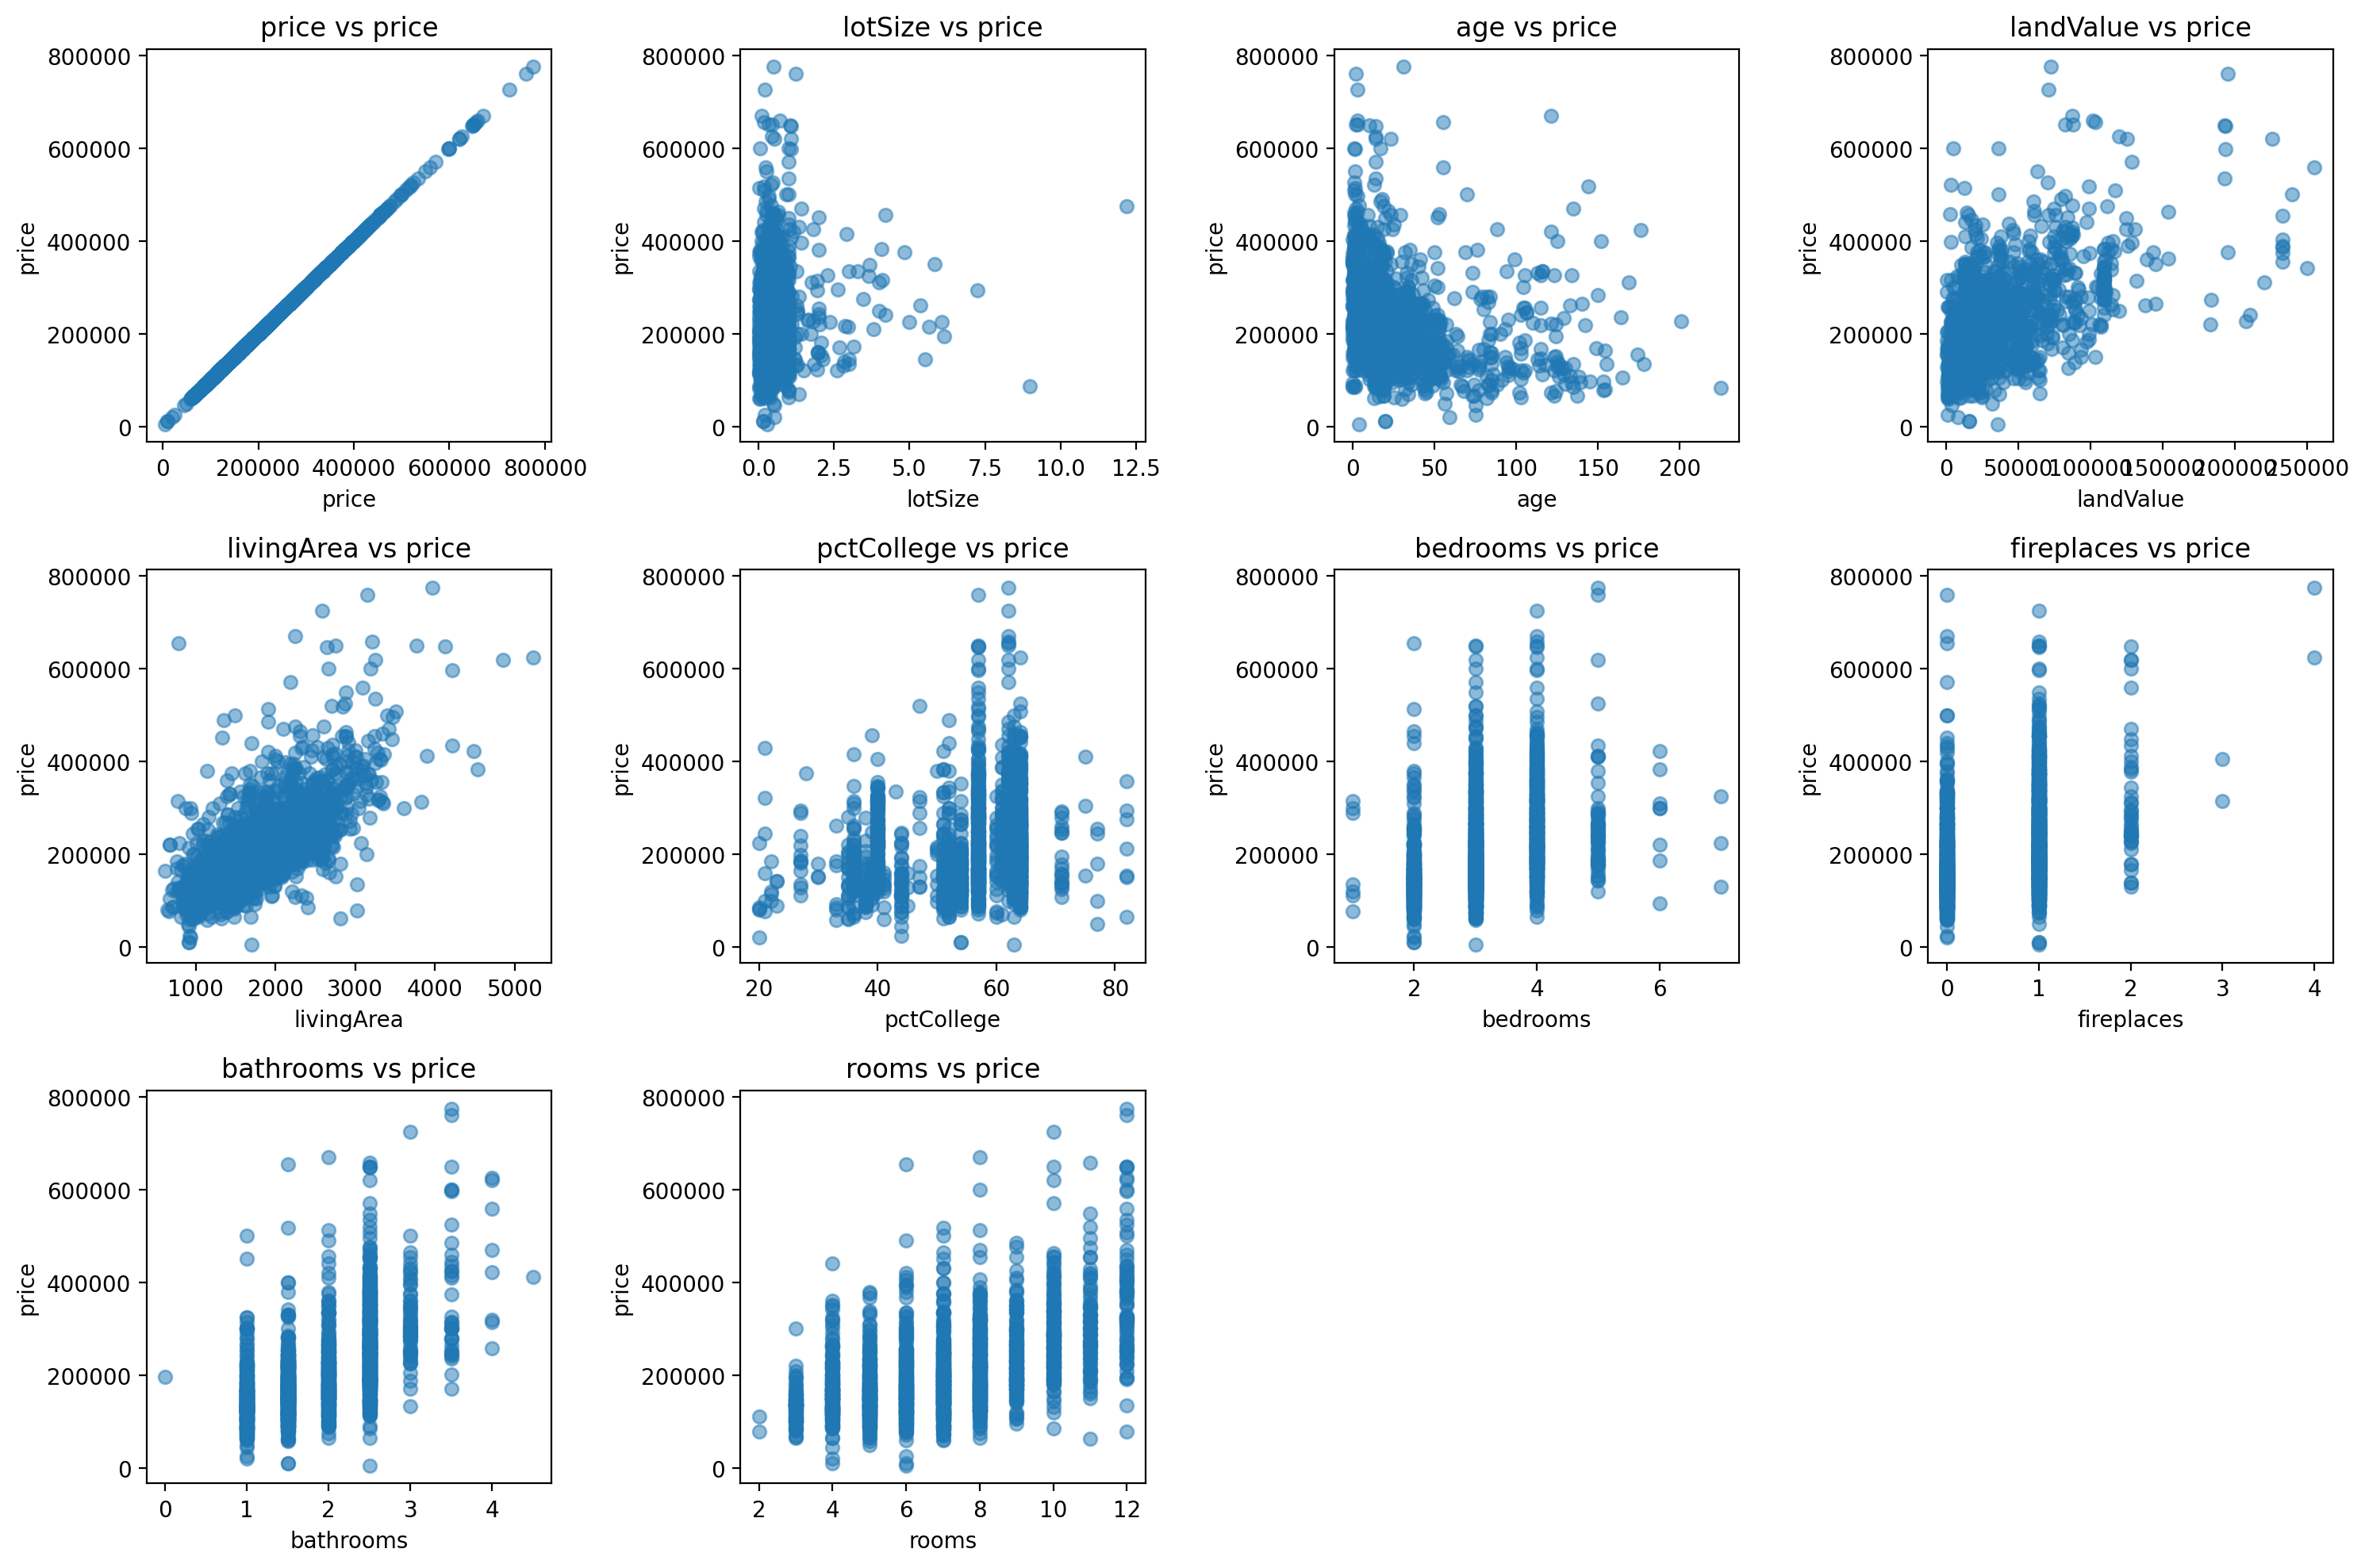

In [ ]:
columnas_numericas = ['price', 'lotSize', 'age', 'landValue', 'livingArea', 'pctCollege',
                      'bedrooms', 'fireplaces', 'bathrooms', 'rooms']

plt.figure(figsize=(15, 10))

for i, columna in enumerate(columnas_numericas, 1):
    plt.subplot(3, 4, i)
    plt.scatter(df_limpio1[columna], df_limpio1['price'], alpha=0.5)
    plt.title(f'{columna} vs price')
    plt.xlabel(columna)
    plt.ylabel('price')

plt.tight_layout()
plt.show()

**Las variables parecen seguir la misma lógica que habíamos notado anteriormente.**

### Variables Categóricas

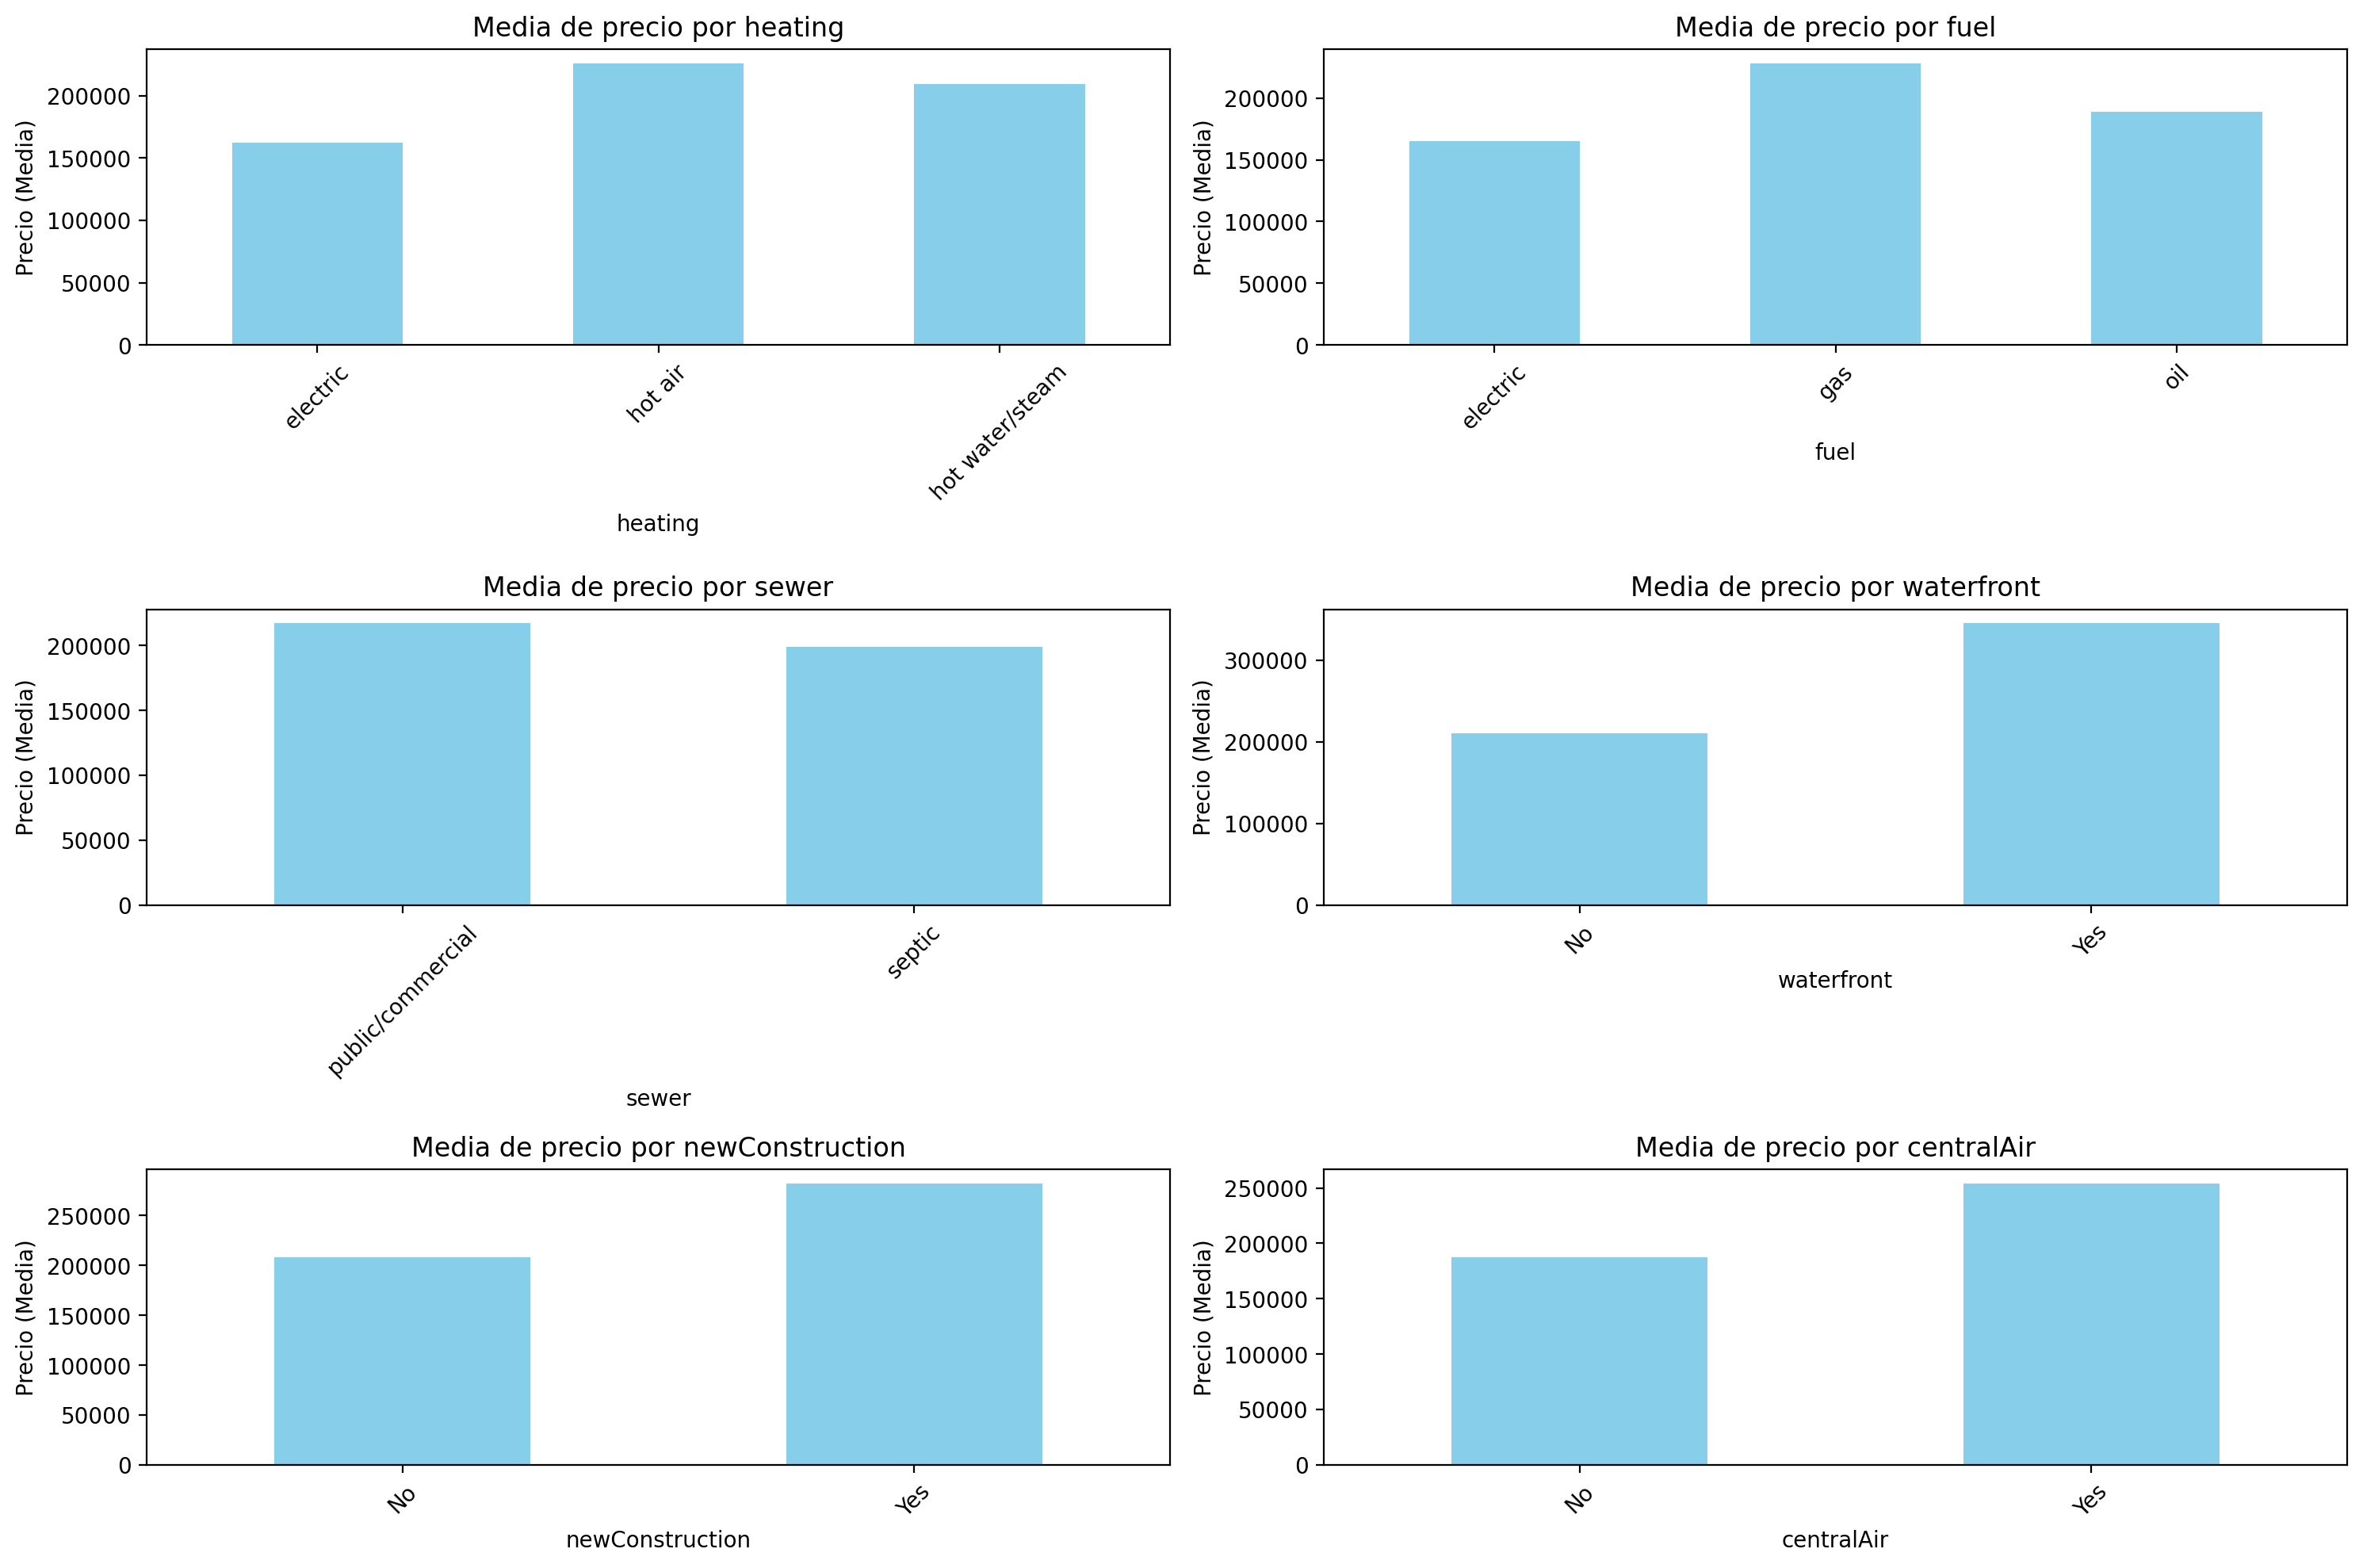

In [ ]:
columnas_categoricas = ['heating', 'fuel', 'sewer', 'waterfront', 'newConstruction', 'centralAir']

plt.figure(figsize=(15, 10))

for i, columna in enumerate(columnas_categoricas, 1):
    plt.subplot(3, 2, i)
    df_limpio1.groupby(columna)['price'].mean().plot(kind='bar', color='skyblue')
    plt.title(f'Media de precio por {columna}')
    plt.xlabel(columna)
    plt.ylabel('Precio (Media)')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**En general también hace sentido, me hubiese esperado que las casas eléctricas sean las más caras pero se ve que no, o por lo menos eso parece en la BBDD**

## ARMADO DEL MODELO

### Tratado de variables categóricas

**Primero voy a sacar la variable desbalanceada que es NewConstruction porque por lo visto anteriormente no se correlacionan significativamente con el precio. En cambio, las variables Waterfront y FirePlaces a pesar de estar desbalanceadas, las voy a dejar porque considero que son datos que afectan mucho a la hora de definir el precio(tienen la mayor corr)**

In [ ]:
df_balanceado = df_limpio1.drop('newConstruction', axis=1)
df_balanceado.columns

Index(['price', 'lotSize', 'age', 'landValue', 'livingArea', 'pctCollege',
       'bedrooms', 'fireplaces', 'bathrooms', 'rooms', 'heating', 'fuel',
       'sewer', 'waterfront', 'centralAir'],
      dtype='object')

**Ahora cambio los valores booleanos para convertirlos en númericos**

In [ ]:
df_balanceado['waterfront'] = df_balanceado['waterfront'].replace({'No': 0, 'Yes': 1})
df_balanceado['centralAir'] = df_balanceado['centralAir'].replace({'No': 0, 'Yes': 1})

**Voy a hacer la codificación de las variables categóricas utlizando One hote enconder para después poder armar el modelo**

In [ ]:
cat_cols = df_balanceado.select_dtypes(include=['object']).columns
for column in cat_cols:
  print("There are", len(df_balanceado[column].unique()), "unique values for column", column ,". These values are:", df_balanceado[column].unique())

In [ ]:
columnas_categoricas = ['heating', 'fuel', 'sewer']

df_balanceado_encoded = pd.get_dummies(df_balanceado, columns=columnas_categoricas)
df_balanceado_encoded

price  lotSize         age  landValue  livingArea  pctCollege  \
0     132500     0.09   42.000000      50000         906          35   
1     181115     0.92    1.347826      22300        1953          51   
2     109000     0.19  133.000000       7300        1944          51   
3     155000     0.41   13.000000      18700        1944          51   
4      86060     0.11    0.000000      15000         840          51   
...      ...      ...         ...        ...         ...         ...   
1723  289000     0.38   32.000000      24200        2310          61   
1724  285000     0.94   37.000000      36200        2564          61   
1725  194900     0.39    9.000000      20400        1099          51   
1726  125000     0.24   48.000000      16800        1225          51   
1727  111300     0.59   86.000000      26000        1959          51   

      bedrooms  fireplaces  bathrooms  rooms  waterfront  centralAir  \
0            2           1        1.0      5           0           0   
1            3           0        2.5      6           0           0   
2            4           1        1.0      8           0           0   
3            3           1        1.5      5           0           0   
4            2           0        1.0      3           0           1   
...        ...         ...        ...    ...         ...         ...   
1723         5           1        2.5     11           0           0   
1724         4           1        2.5     11           0           0   
1725         2           0        1.0      3           0           0   
1726         3           1        1.0      7           0           0   
1727         3           0        1.0      6           0           0   

      heating_electric  heating_hot air  heating_hot water/steam  \
0                 True            False                    False   
1                False            False                     True   
2                False            False                     True   
3                False             True                    False   
4                False             True                    False   
...                ...              ...                      ...   
1723             False            False                     True   
1724             False            False                     True   
1725             False             True                    False   
1726             False             True                    False   
1727             False             True                    False   

      fuel_electric  fuel_gas  fuel_oil  sewer_public/commercial  sewer_septic  
0              True     False     False                    False          True  
1             False      True     False                    False          True  
2             False      True     False                     True         False  
3             False      True     False                    False          True  
4             False      True     False                     True         False  
...             ...       ...       ...                      ...           ...  
1723          False      True     False                     True         False  
1724          False      True     False                     True         False  
1725          False      True     False                     True         False  
1726          False      True     False                     True         False  
1727          False      True     False                    False          True  

[1720 rows x 20 columns]

In [ ]:
df_encoded = df_balanceado_encoded.replace({True: 1, False: 0})
df_encoded

price  lotSize         age  landValue  livingArea  pctCollege  \
0     132500     0.09   42.000000      50000         906          35   
1     181115     0.92    1.347826      22300        1953          51   
2     109000     0.19  133.000000       7300        1944          51   
3     155000     0.41   13.000000      18700        1944          51   
4      86060     0.11    0.000000      15000         840          51   
...      ...      ...         ...        ...         ...         ...   
1723  289000     0.38   32.000000      24200        2310          61   
1724  285000     0.94   37.000000      36200        2564          61   
1725  194900     0.39    9.000000      20400        1099          51   
1726  125000     0.24   48.000000      16800        1225          51   
1727  111300     0.59   86.000000      26000        1959          51   

      bedrooms  fireplaces  bathrooms  rooms  waterfront  centralAir  \
0            2           1        1.0      5           0           0   
1            3           0        2.5      6           0           0   
2            4           1        1.0      8           0           0   
3            3           1        1.5      5           0           0   
4            2           0        1.0      3           0           1   
...        ...         ...        ...    ...         ...         ...   
1723         5           1        2.5     11           0           0   
1724         4           1        2.5     11           0           0   
1725         2           0        1.0      3           0           0   
1726         3           1        1.0      7           0           0   
1727         3           0        1.0      6           0           0   

      heating_electric  heating_hot air  heating_hot water/steam  \
0                    1                0                        0   
1                    0                0                        1   
2                    0                0                        1   
3                    0                1                        0   
4                    0                1                        0   
...                ...              ...                      ...   
1723                 0                0                        1   
1724                 0                0                        1   
1725                 0                1                        0   
1726                 0                1                        0   
1727                 0                1                        0   

      fuel_electric  fuel_gas  fuel_oil  sewer_public/commercial  sewer_septic  
0                 1         0         0                        0             1  
1                 0         1         0                        0             1  
2                 0         1         0                        1             0  
3                 0         1         0                        0             1  
4                 0         1         0                        1             0  
...             ...       ...       ...                      ...           ...  
1723              0         1         0                        1             0  
1724              0         1         0                        1             0  
1725              0         1         0                        1             0  
1726              0         1         0                        1             0  
1727              0         1         0                        0             1  

[1720 rows x 20 columns]

### Escalado de Variables numéricas

**Escalo las variables numéricas para que los modelos funcionen mejor**

In [ ]:
from sklearn.preprocessing import StandardScaler

col_escalables = ['price', 'lotSize', 'age', 'landValue', 'livingArea', 'pctCollege',
                  'bedrooms', 'fireplaces', 'bathrooms', 'rooms']

scaler = StandardScaler()
df_modelo = df_encoded.copy()
df_modelo[col_escalables] = scaler.fit_transform(df_modelo[col_escalables])

df_modelo

price   lotSize       age  landValue  livingArea  pctCollege  \
0    -0.813278 -0.588257  0.478840   0.460651   -1.372552   -1.987245   
1    -0.315177  0.597979 -0.912315  -0.357109    0.316590   -0.441878   
2    -1.054055 -0.445337  3.592944  -0.799939    0.302070   -0.441878   
3    -0.582747 -0.130913 -0.513566  -0.463388    0.302070   -0.441878   
4    -1.289094 -0.559673 -0.958438  -0.572619   -1.479031   -0.441878   
...        ...       ...       ...        ...         ...         ...   
1723  0.790195 -0.173789  0.136631  -0.301017    0.892544    0.523976   
1724  0.749212  0.626563  0.307736   0.053247    1.302326    0.523976   
1725 -0.173938 -0.159497 -0.650450  -0.413200   -1.061182   -0.441878   
1726 -0.890122 -0.373877  0.684166  -0.519480   -0.857904   -0.441878   
1727 -1.030490  0.126343  1.984561  -0.247877    0.326270   -0.441878   

      bedrooms  fireplaces  bathrooms     rooms  waterfront  centralAir  \
0    -1.416704    0.714148  -1.369913 -0.887220           0           0   
1    -0.192831   -1.084292   0.908125 -0.454798           0           0   
2     1.031042    0.714148  -1.369913  0.410047           0           0   
3    -0.192831    0.714148  -0.610567 -0.887220           0           0   
4    -1.416704   -1.084292  -1.369913 -1.752065           0           1   
...        ...         ...        ...       ...         ...         ...   
1723  2.254914    0.714148   0.908125  1.707314           0           0   
1724  1.031042    0.714148   0.908125  1.707314           0           0   
1725 -1.416704   -1.084292  -1.369913 -1.752065           0           0   
1726 -0.192831    0.714148  -1.369913 -0.022375           0           0   
1727 -0.192831   -1.084292  -1.369913 -0.454798           0           0   

      heating_electric  heating_hot air  heating_hot water/steam  \
0                    1                0                        0   
1                    0                0                        1   
2                    0                0                        1   
3                    0                1                        0   
4                    0                1                        0   
...                ...              ...                      ...   
1723                 0                0                        1   
1724                 0                0                        1   
1725                 0                1                        0   
1726                 0                1                        0   
1727                 0                1                        0   

      fuel_electric  fuel_gas  fuel_oil  sewer_public/commercial  sewer_septic  
0                 1         0         0                        0             1  
1                 0         1         0                        0             1  
2                 0         1         0                        1             0  
3                 0         1         0                        0             1  
4                 0         1         0                        1             0  
...             ...       ...       ...                      ...           ...  
1723              0         1         0                        1             0  
1724              0         1         0                        1             0  
1725              0         1         0                        1             0  
1726              0         1         0                        1             0  
1727              0         1         0                        0             1  

[1720 rows x 20 columns]

### ARMADO DE FUNCION PARA LOS MODELOS

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
import scipy.stats as st
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
import lightgbm
from lightgbm import LGBMClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, f1_score, roc_curve, auc, precision_score, recall_score
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [ ]:
#Divido el df en train y test
y = df_modelo['price']
X = df_modelo.loc[:, df_modelo.columns != 'price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.feature_selection import f_regression

def model_trial_regression(model, parameters):
    np.random.seed(42)

    # Queremos asegurarnos de tener los mismos 5 splits de data cada vez.
    # Para lograr eso creamos un KFold object, kf, y lo pasamos como cv=kf en vez del normal cv=5.
    kf = KFold(n_splits=5, shuffle=False)

    # Definimos un pipeline
    pipe = Pipeline([('scaler', StandardScaler()), ('selector', SelectKBest(f_regression)), ('regressor', model)])

    # Realizamos la validación cruzada Gridsearch para encontrar los mejores parámetros
    grid = GridSearchCV(pipe, parameters, cv=kf, scoring='neg_mean_squared_error')  # Buscamos minimizar el MSE
    grid.fit(X_train, y_train)

    # Obtenemos los mejores parametros y el modelo con ese valor
    best_params = grid.best_params_
    best_model = grid.best_estimator_
    best_score = grid.best_score_

    # Evaluamos el modelo en train y calculamos las métricas
    y_train_pred = best_model.predict(X_train)
    r2_train = r2_score(y_train, y_train_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    mae_train = mean_absolute_error(y_train, y_train_pred)

    # Evaluamos el modelo en test y calculamos las métricas
    y_pred = best_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"Mejores parámetros: {best_params}")
    print(f"R^2 Train: {r2_train} and R^2 Test: {r2}")
    print(f"MSE Train: {mse_train} and MSE Test: {mse}")
    print(f"RMSE Train: {rmse_train} and RMSE Test: {rmse}")
    print(f"MAE Train: {mae_train} and MAE Test: {mae}")

    return r2, mse, rmse, mae, best_model, r2_train, mse_train, rmse_train, mae_train

def model_trial_regression2(model, parameters, xgb_reg):
    # Crea un pipeline con el modelo y los pasos de preprocesamiento
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('selector', SelectKBest()),
        ('regressor', model)
    ])

    # Combina los parámetros del modelo con los parámetros del preprocesamiento
    param_grid = {
        'selector__score_func': [f_regression],
        **parameters
    }

    # Realiza la búsqueda de hiperparámetros
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    # Obtiene el mejor modelo y sus métricas
    best_model = grid_search.best_estimator_
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    return best_model, mse_train, mse_test, r2_test

### Regresión Lineal

In [ ]:
import statsmodels.api as sm

X_train_con_constante = sm.add_constant(X_train)

# Crea el modelo de regresión lineal
modelo_regresion_statsmodels = sm.OLS(y_train, X_train_con_constante)

# Ajusta (o entrena) el modelo
resultado_modelo = modelo_regresion_statsmodels.fit(random_state=99)

# Muestra un resumen del modelo
print(resultado_modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     153.7
Date:                Thu, 09 May 2024   Prob (F-statistic):          8.22e-291
Time:                        16:10:22   Log-Likelihood:                -1213.6
No. Observations:                1376   AIC:                             2461.
Df Residuals:                    1359   BIC:                             2550.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred_train = resultado_modelo.predict(X_train_con_constante)
y_pred_test = resultado_modelo.predict(sm.add_constant(X_test))

# Calcula el MSE
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Calcula el RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Calcula el MAE
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("Métricas del modelo sin filtrar:")
print("MSE (Conjunto de entrenamiento):", mse_train)
print("MSE (Conjunto de prueba):", mse_test)
print("RMSE (Conjunto de entrenamiento):", rmse_train)
print("RMSE (Conjunto de prueba):", rmse_test)
print("MAE (Conjunto de entrenamiento):", mae_train)
print("MAE (Conjunto de prueba):", mae_test)

Métricas del modelo sin filtrar:
MSE (Conjunto de entrenamiento): 0.34167070116404336
MSE (Conjunto de prueba): 0.44877769172243714
RMSE (Conjunto de entrenamiento): 0.5845260483195281
RMSE (Conjunto de prueba): 0.6699087189479155
MAE (Conjunto de entrenamiento): 0.4208079866518365
MAE (Conjunto de prueba): 0.4500351998362704


*   **El r cuadrado no es muy alto, buscamos que sea más cercano a 1**
*   **Los coeficientes más importantes son Waterfront, Landvalue y LivingArea. Se correlaciona con lo que veíamos antes en el análisis exploratorio.**
*   **Voy a sacar los coeficientes con p value altos para dejar los que son significativos a ver si mejora el modelo**
*   **Lo que es positivo es que no hay muchas varianza entre los resultados de test y train, por lo que el modelo no está overfiteado**



In [ ]:
X_test_constante = sm.add_constant(X_test)
coeficientes_filtrados = resultado_modelo.params[resultado_modelo.pvalues <= 0.1]

# Obtén las características correspondientes a los coeficientes filtrados
caracteristicas_filtradas = X_train_con_constante.columns[resultado_modelo.pvalues <= 0.1]

# Ajusta un nuevo modelo con los coeficientes filtrados
X_train_filtrado = X_train_con_constante[caracteristicas_filtradas]
X_test_filtrado = X_test_constante[caracteristicas_filtradas]

modelo_regresion_statsmodels_filtrado = sm.OLS(y_train, X_train_filtrado)

# Ajusta (o entrena) el nuevo modelo
resultado_modelo_filtrado = modelo_regresion_statsmodels_filtrado.fit()

# Muestra un resumen del modelo filtrado
print(resultado_modelo_filtrado.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     245.0
Date:                Thu, 09 May 2024   Prob (F-statistic):          3.27e-296
Time:                        16:10:32   Log-Likelihood:                -1217.2
No. Observations:                1376   AIC:                             2456.
Df Residuals:                    1365   BIC:                             2514.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred_train_filtrado = resultado_modelo_filtrado.predict(X_train_filtrado)
y_pred_test_filtrado = resultado_modelo_filtrado.predict(X_test_filtrado)

# Calcula el MSE para el modelo filtrado
mse_train_filtrado = mean_squared_error(y_train, y_pred_train_filtrado)
mse_test_filtrado = mean_squared_error(y_test, y_pred_test_filtrado)

# Calcula el RMSE para el modelo filtrado
rmse_train_filtrado = np.sqrt(mse_train_filtrado)
rmse_test_filtrado = np.sqrt(mse_test_filtrado)

# Calcula el MAE para el modelo filtrado
mae_train_filtrado = mean_absolute_error(y_train, y_pred_train_filtrado)
mae_test_filtrado = mean_absolute_error(y_test, y_pred_test_filtrado)

print("Métricas del modelo filtrado:")
print("MSE (Conjunto de entrenamiento):", mse_train_filtrado)
print("MSE (Conjunto de prueba):", mse_test_filtrado)
print("RMSE (Conjunto de entrenamiento):", rmse_train_filtrado)
print("RMSE (Conjunto de prueba):", rmse_test_filtrado)
print("MAE (Conjunto de entrenamiento):", mae_train_filtrado)
print("MAE (Conjunto de prueba):", mae_test_filtrado)

Métricas del modelo filtrado:
MSE (Conjunto de entrenamiento): 0.3434697510042682
MSE (Conjunto de prueba): 0.44975022280026083
RMSE (Conjunto de entrenamiento): 0.5860629240996807
RMSE (Conjunto de prueba): 0.6706341944758415
MAE (Conjunto de entrenamiento): 0.4209021479734597
MAE (Conjunto de prueba): 0.45022377339671377


**Saqué las variables con p values bajo y no mejoró el r2, ni los indicadores, así que en principio me quedo con el primer modelo**
**Voy a probar de hacer uno solo con las variables que más se correlacionaban al principio para ver como da**

In [ ]:
X_train_subset = X_train[['bathrooms', 'bedrooms', 'landValue', 'livingArea', 'rooms']]

# Crea el modelo de regresión lineal
modelo_regresion_statsmodels = sm.OLS(y_train, X_train_subset)

# Ajusta (o entrena) el modelo
resultado_modelo = modelo_regresion_statsmodels.fit(random_state=99)

# Muestra un resumen del modelo
print(resultado_modelo.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.625
Model:                            OLS   Adj. R-squared (uncentered):              0.624
Method:                 Least Squares   F-statistic:                              457.2
Date:                Thu, 09 May 2024   Prob (F-statistic):                   5.78e-289
Time:                        16:10:38   Log-Likelihood:                         -1249.5
No. Observations:                1376   AIC:                                      2509.
Df Residuals:                    1371   BIC:                                      2535.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
y_pred_train_filtrado = resultado_modelo.predict(X_train_subset)
y_pred_test_filtrado = resultado_modelo.predict(X_test[['bathrooms', 'bedrooms', 'landValue', 'livingArea', 'rooms']])

# Calcula el MSE para el modelo filtrado
mse_train_filtrado = mean_squared_error(y_train, y_pred_train_filtrado)
mse_test_filtrado = mean_squared_error(y_test, y_pred_test_filtrado)

# Calcula el RMSE para el modelo filtrado
rmse_train_filtrado = np.sqrt(mse_train_filtrado)
rmse_test_filtrado = np.sqrt(mse_test_filtrado)

# Calcula el MAE para el modelo filtrado
mae_train_filtrado = mean_absolute_error(y_train, y_pred_train_filtrado)
mae_test_filtrado = mean_absolute_error(y_test, y_pred_test_filtrado)

print("Métricas del modelo filtrado:")
print("MSE (Conjunto de entrenamiento):", mse_train_filtrado)
print("MSE (Conjunto de prueba):", mse_test_filtrado)
print("RMSE (Conjunto de entrenamiento):", rmse_train_filtrado)
print("RMSE (Conjunto de prueba):", rmse_test_filtrado)
print("MAE (Conjunto de entrenamiento):", mae_train_filtrado)
print("MAE (Conjunto de prueba):", mae_test_filtrado)

Métricas del modelo filtrado:
MSE (Conjunto de entrenamiento): 0.3599565727401615
MSE (Conjunto de prueba): 0.4778402705136907
RMSE (Conjunto de entrenamiento): 0.5999638095253426
RMSE (Conjunto de prueba): 0.6912599153094954
MAE (Conjunto de entrenamiento): 0.4322601325113568
MAE (Conjunto de prueba): 0.4666749847362874


**Devuelta no mejora el r2 ni los errores vs el primer modelo**

**Por último, voy a probar usando la función que armamos antes para ver si puedo llegar a un mejor modelo probando distintos ks**

In [ ]:
model = LinearRegression()

# Definir los parámetros que deseas probar
parameters = {'selector__k': [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]}  # Por ejemplo, probar diferentes números de características

# Definir el pipeline con la selección de características y el modelo de regresión lineal
pipeline = Pipeline([('selector', SelectKBest(f_regression)), ('regressor', model)])

# Utilizar la función model_trial_regression para optimizar los parámetros
model_trial_regression(pipeline, parameters)

Mejores parámetros: {'selector__k': 10}
R^2 Train: 0.6305873551983145 and R^2 Test: 0.5887465746011291
MSE Train: 0.3546653876629731 and MSE Test: 0.47685921918976465
RMSE Train: 0.5955378977554435 and RMSE Test: 0.6905499396783441
MAE Train: 0.4311478550315839 and MAE Test: 0.4655086195439147


(0.5887465746011291,
 0.47685921918976465,
 0.6905499396783441,
 0.4655086195439147,
 Pipeline(steps=[('scaler', StandardScaler()),
                 ('selector',
                  SelectKBest(score_func=<function f_regression at 0x7d4c7cf61000>)),
                 ('regressor',
                  Pipeline(steps=[('selector',
                                   SelectKBest(score_func=<function f_regression at 0x7d4c7cf61000>)),
                                  ('regressor', LinearRegression())]))]),
 0.6305873551983145,
 0.3546653876629731,
 0.5955378977554435,
 0.4311478550315839)

**El r2 es menor y los errores mayores, así que lo descartamos**

### XGBoost Regressor

In [ ]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(random_state=99)
xgb_reg.fit(X_train, y_train)

importancia_caracteristicas = xgb_reg.feature_importances_

# Realiza predicciones en el conjunto de entrenamiento
y_pred_train = xgb_reg.predict(X_train)

# Calcula el error cuadrático medio y el coeficiente de determinación (R^2) para el conjunto de entrenamiento
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print("Resultados para el conjunto de entrenamiento:")
print("Mean Squared Error (MSE):", mse_train)
print("Coeficiente de determinación (R^2):", r2_train)

# Realiza predicciones en el conjunto de prueba (ya las habías hecho)
y_pred_test = xgb_reg.predict(X_test)

# Calcula el error cuadrático medio y el coeficiente de determinación (R^2) para el conjunto de prueba
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nResultados para el conjunto de prueba:")
print("Mean Squared Error (MSE):", mse_test)
print("Coeficiente de determinación (R^2):", r2_test)


Resultados para el conjunto de entrenamiento:
Mean Squared Error (MSE): 0.004854058065193917
Coeficiente de determinación (R^2): 0.9949441065007781

Resultados para el conjunto de prueba:
Mean Squared Error (MSE): 0.37868185907118074
Coeficiente de determinación (R^2): 0.6734167959590992


**La primera impresión es que muy overfitteado este modelo. Sin embargo, noto una mejora en el r2 y en el MSE (más bajo), por lo que puede resultarnos positivo. Vamos a ver si podemos mejorar esto un poco más**

In [ ]:
# Define el modelo base
xgb_reg = XGBRegressor(random_state=99)

# Define los parámetros a optimizar
parameters = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__subsample': [0.6, 0.8, 1.0],
    'selector__k': [2,4,8,10]
    }

# Llama a la función model_trial_regression
best_model, mse_train, mse_test, r2_test = model_trial_regression2(XGBRegressor(), parameters, xgb_reg)

# Imprime los resultados
print("Mean Squared Error (MSE) en conjunto de entrenamiento:", mse_train)
print("Mean Squared Error (MSE) en conjunto de prueba:", mse_test)
print("Coeficiente de determinación (R^2) en conjunto de prueba:", r2_test)

Mean Squared Error (MSE) en conjunto de entrenamiento: 0.1946473926746225
Mean Squared Error (MSE) en conjunto de prueba: 0.4486148485761014
Coeficiente de determinación (R^2) en conjunto de prueba: 0.613105114177737


In [ ]:
print(best_model)

Pipeline(steps=[('scaler', StandardScaler()),
                ('selector',
                 SelectKBest(k=4,
                             score_func=<function f_regression at 0x7d4c7cf61000>)),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_...w_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.01,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              

**No noto mejoras significativas, así que me quedo con el primer modelo**

### LGBM

In [ ]:
#Ahora vamos a hace lo mismo pero LGBM

In [ ]:
model = LGBMClassifier(multi_class='ovr', random_state = 99)
parameters = {
    'selector__k': [5, 19],
    'classifier__n_estimators': [10, 50],
    'classifier__max_depth': [2,4,10],
    'classifier__learning_rate': [0.1]
}
lgbm = model_trial(model, parameters)
lgbm

## Conclusión

### XGBOOST

**Para el xgboost necesito tener la variable precio como una variable categorica de target, por lo que voy a segmentar el precio en rangos**

In [ ]:
num_bins = 19
precio_min = df_modelo['price'].min()
precio_max = df_modelo['price'].max()
bin_edges = np.linspace(precio_min, precio_max, num_bins + 1)
bin_labels = range(0, num_bins)

df_modelo['precio_rango'] = pd.cut(df_modelo['price'], bins=bin_edges, labels=bin_labels)


In [ ]:
df_modelo_sin_precio = df_modelo.drop('price', axis=1)


In [ ]:
df_modelo_sin_precio = df_modelo_sin_precio.dropna(subset=['precio_rango'])

In [ ]:
df_modelo_sin_precio['precio_rango'].isna().sum()

0

In [ ]:
#Divido el df en train y test
y = df_modelo_sin_precio['precio_rango']
X = df_modelo_sin_precio.loc[:, df_modelo_sin_precio.columns != 'precio_rango']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [ ]:
from xgboost.sklearn import XGBClassifier

XGB_boost_clf = XGBClassifier(n_estimators=30)
XGB_boost_clf.fit(X_train, y_train)
evaluate(XGB_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[  5   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  27   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 175   6   1   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  13 281  10   1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   2  11 255   4   1   1   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1  13 180   3   1   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   2   5   2 128   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   2   1   1  90   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  59   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0  41   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  20   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   9   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0   0   0   0   5   0   0   

**No llego a mejorarlo, pero esto es un claro caso de overfitting. En el training me da espectacular pero cuando lo llevo a la practica me dan bajisimas las metricas**

In [ ]:
model = XGBClassifier(multi_class='ovr', random_state=99)
parameters = {
    'selector__k': [5, 10],
    'classifier__n_estimators': [10, 50],
    'classifier__max_depth': [2,10,20],
    'classifier__learning_rate': [0.1]

}
xgb = model_trial(model, parameters)
xgb

ValueError: multi_class must be in ('ovo', 'ovr')